In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge

In [2]:
class CONFIG:
    INDEXS = ["R2 Pred", "R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]
    ALPHAS = [0.001 * 2 ** (n - 1) for n in range(1, 30)]
    N_SPLITS = 5

# Load Dataset

In [3]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [4]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
19823,1457476,0,3961,10,0.0,55.0,4.390805,2.0,9.149281,0.0,...,0,0,0,1,0,0,0,0,0,0
33866,155048,0,34292,18,0.0,1037.0,63.929688,41.0,102.554954,0.0,...,0,0,0,0,0,0,1,0,0,2
15281,12502094,1,36292,14,0.0,1255.0,177.114286,124.0,197.370298,0.0,...,1,0,1,0,0,0,0,0,0,12
40071,11782829,1,11421,14,0.0,612.0,124.394737,68.0,142.426627,0.0,...,0,1,1,0,0,0,0,0,0,10
37020,20189,0,66,24,0.0,14.0,3.482759,3.0,3.558581,0.0,...,0,0,0,0,0,0,1,0,0,0
879,6887,0,20,19,0.0,13.0,1.270677,0.0,2.077910,0.0,...,1,0,0,0,0,0,0,0,1,0
3698,81756,0,2947,36,0.0,182.0,20.431694,12.0,26.890681,0.0,...,0,0,0,0,1,0,0,0,0,0
13074,9422,7750,189,34,0.0,3.0,0.419355,0.0,0.730629,0.0,...,1,0,0,1,0,0,0,0,0,0
4131,420838,148,606,39,0.0,345.0,19.825688,14.0,28.292004,0.0,...,0,0,0,1,0,0,0,0,0,0
29454,204478,0,3661,92,0.0,368.0,51.688525,13.0,79.076543,0.0,...,0,1,0,1,0,0,0,0,0,0


In [5]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
40944,1
40945,2
40946,72
40947,28


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

# Ridge

## Normalization

In [8]:
def normalize(X_train, X_test, y_train, y_test):
    x_scaler = StandardScaler()
    x_scaler.fit(X_train)
    X_train_norm = x_scaler.transform(X_train)
    X_test_norm = x_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    y_train_norm = y_scaler.transform(y_train)
    y_test_norm = y_scaler.transform(y_test)
    return X_train_norm, X_test_norm, y_train_norm, y_test_norm

## K Fold Cross Validation

In [9]:
def k_flod_cross_validation(kf, alpha, features, labels):
     
    # Figure Config
    fig, axes = plt.subplots(1, CONFIG.N_SPLITS, figsize=(25, 4), sharex=True)
    plt.tight_layout()

    print("alpha: %s" % alpha)
    r2_preds, r2s, evs, mes, mean_aes, mses, median_aes = [], [], [], [], [], [], []
    for k, (train, test) in enumerate(kf.split(features, labels)):
        # Data Splitting
        X_train, X_test = features.iloc[train], features.iloc[test]
        y_train, y_test = labels.iloc[train], labels.iloc[test]
        
        # Normalization
        X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize(X_train, X_test, y_train, y_test)

        # Ridge
        model = Ridge(alpha=alpha)

        # Model Training
        predict = train_model(model, X_train_norm, y_train_norm, X_test_norm)
        plot_test_predict(y_train, y_test_norm, predict, axes, k)

        # Model Evaluation
        r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, y_train, X_test_norm, y_test_norm, predict)
        r2_preds.append(r2_pred)
        r2s.append(r2)
        evs.append(ev)
        mes.append(me)
        mean_aes.append(mean_ae)
        mses.append(mse)
        median_aes.append(median_ae)
    
    means = [np.mean(r2_preds), np.mean(r2s), np.mean(evs), np.mean(mes), 
             np.mean(mean_aes), np.mean(mses), np.mean(median_aes)]
    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": means
    })
    print(results)

    plt.show()
    print("-----------------------------------------------------------------")
    
    return means

## Model Training

In [10]:
def train_model(model, X_train_norm, y_train_norm, X_test_norm):
    model.fit(X_train_norm, y_train_norm.ravel())
    predict = model.predict(X_test_norm)
    return predict

In [11]:
def plot_test_predict(y_train, y_test_norm, predict, axes=None, k=None):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    test_predict = pd.concat(
        [pd.DataFrame(y_scaler.inverse_transform(y_test_norm)),
         pd.DataFrame(y_scaler.inverse_transform(predict.reshape(-1, 1)))
        ], axis=1)
    headers =  ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50))

## Model Evaluation

In [12]:
def evaluate(model, y_train, X_test_norm, y_test_norm, predict):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    
    # R-Squared Prediction
    r2_pred = model.score(X_test_norm, y_test_norm)
    
    # R-Squared
    r2 = r2_score(y_scaler.inverse_transform(y_test_norm),
                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Explained Variance Score
    ev = explained_variance_score(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Max Error
    me = max_error(y_scaler.inverse_transform(y_test_norm), 
                   y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Squared Error
    mse = mean_squared_error(y_scaler.inverse_transform(y_test_norm),
                             y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_scaler.inverse_transform(y_test_norm), 
                                      y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    return r2_pred, r2, ev, me, mean_ae, mse, median_ae

## Hyperparameter Selection

In [13]:
def select_hyperparam():
    # K Fold Cross Validation
    kf = KFold(shuffle=True, random_state=42, n_splits=CONFIG.N_SPLITS)

    results = []
    for alpha in CONFIG.ALPHAS:
        means = k_flod_cross_validation(kf, alpha, X_train, y_train)
        results.append(means)

    df_evals = pd.DataFrame(np.array(results).transpose(), columns=CONFIG.ALPHAS, index=CONFIG.INDEXS)
    print(df_evals)

    compare_evals = []
    for index in CONFIG.INDEXS:
        if index == "R2 Pred" or index == "R2" or index == "EV":
            compare_evals.append(df_evals.transpose()[index].idxmax())
        else:
            compare_evals.append(df_evals.transpose()[index].idxmin())
    print(pd.DataFrame([compare_evals], columns=CONFIG.INDEXS, index=["Index"]))

alpha: 0.001
       Index         Mean
0    R2 Pred     0.214605
1         R2     0.214605
2         EV     0.214884
3         ME  1137.112907
4    MEAN_AE     8.781676
5        MSE  1073.280710
6  MEDIAN_AE     4.281783


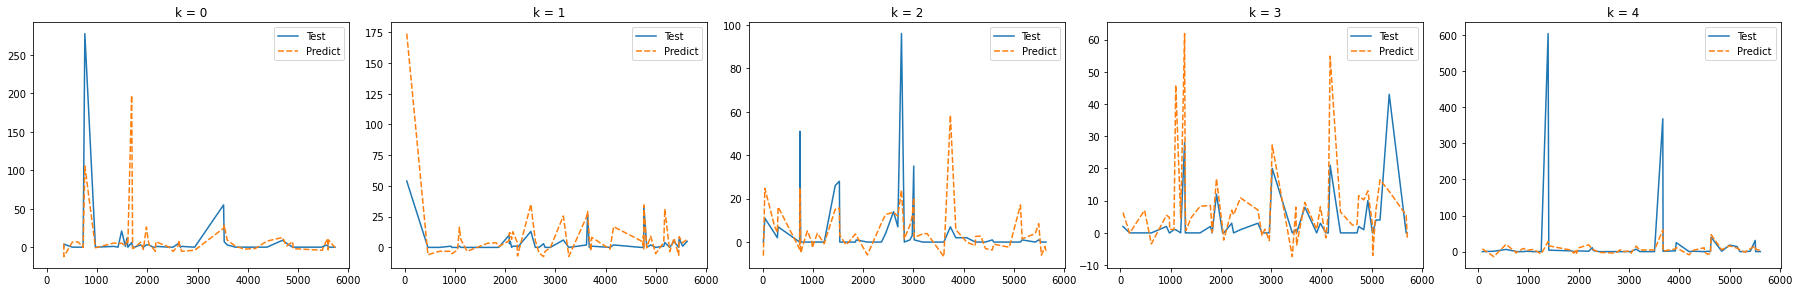

-----------------------------------------------------------------
alpha: 0.002
       Index         Mean
0    R2 Pred     0.214606
1         R2     0.214606
2         EV     0.214885
3         ME  1137.111356
4    MEAN_AE     8.781659
5        MSE  1073.278791
6  MEDIAN_AE     4.281799


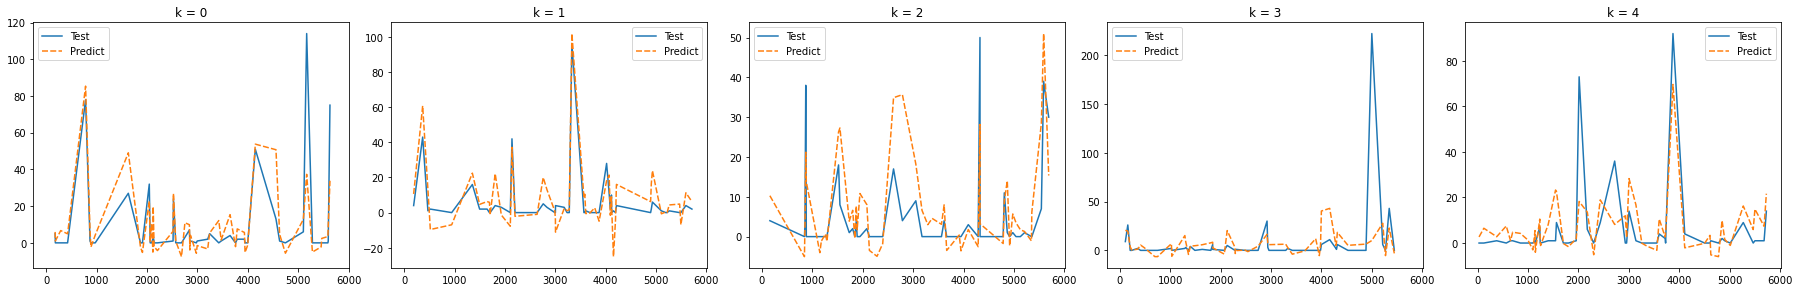

-----------------------------------------------------------------
alpha: 0.004
       Index         Mean
0    R2 Pred     0.214608
1         R2     0.214608
2         EV     0.214887
3         ME  1137.108259
4    MEAN_AE     8.781626
5        MSE  1073.274960
6  MEDIAN_AE     4.281831


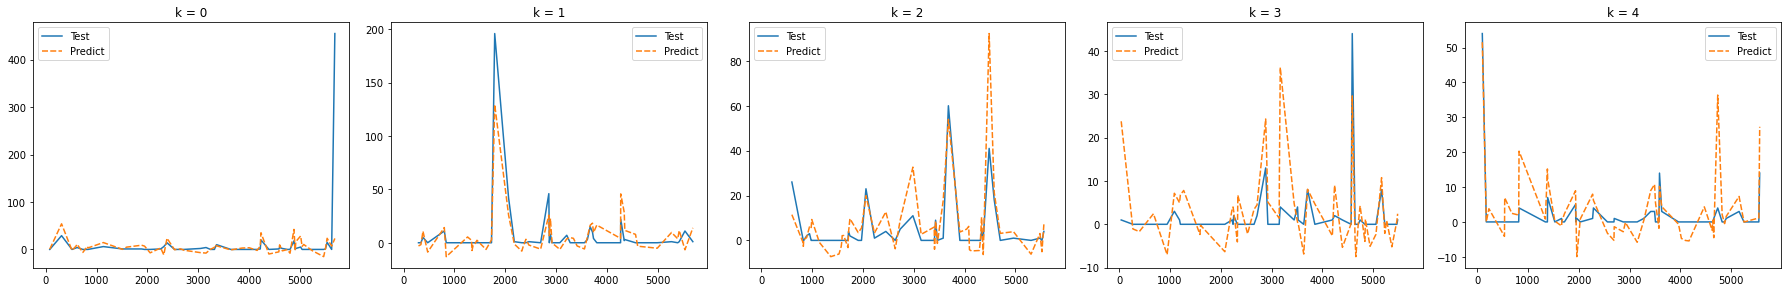

-----------------------------------------------------------------
alpha: 0.008
       Index         Mean
0    R2 Pred     0.214612
1         R2     0.214612
2         EV     0.214891
3         ME  1137.102078
4    MEAN_AE     8.781559
5        MSE  1073.267331
6  MEDIAN_AE     4.282063


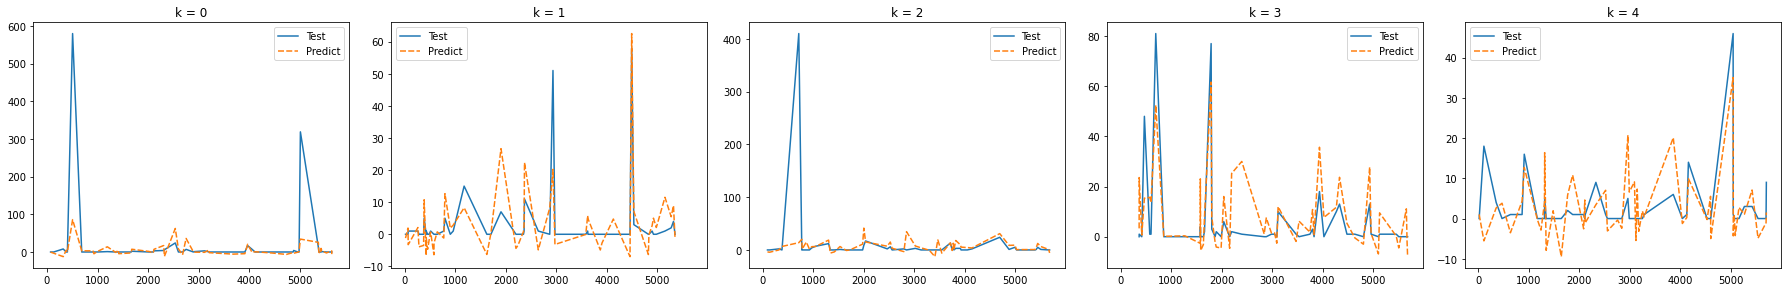

-----------------------------------------------------------------
alpha: 0.016
       Index         Mean
0    R2 Pred     0.214621
1         R2     0.214621
2         EV     0.214900
3         ME  1137.089775
4    MEAN_AE     8.781425
5        MSE  1073.252197
6  MEDIAN_AE     4.282239


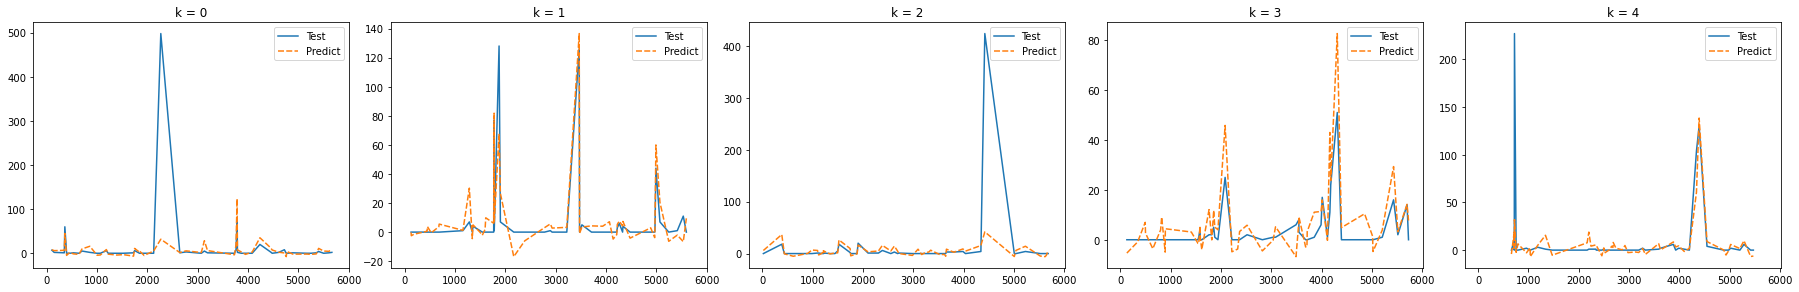

-----------------------------------------------------------------
alpha: 0.032
       Index         Mean
0    R2 Pred     0.214637
1         R2     0.214637
2         EV     0.214916
3         ME  1137.065400
4    MEAN_AE     8.781161
5        MSE  1073.222418
6  MEDIAN_AE     4.282661


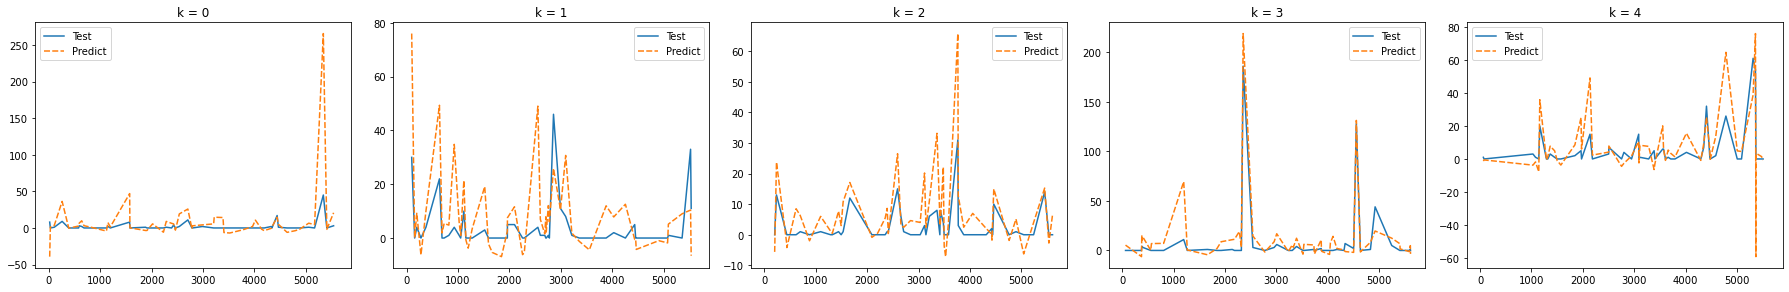

-----------------------------------------------------------------
alpha: 0.064
       Index         Mean
0    R2 Pred     0.214669
1         R2     0.214669
2         EV     0.214948
3         ME  1137.017547
4    MEAN_AE     8.780658
5        MSE  1073.164732
6  MEDIAN_AE     4.281942


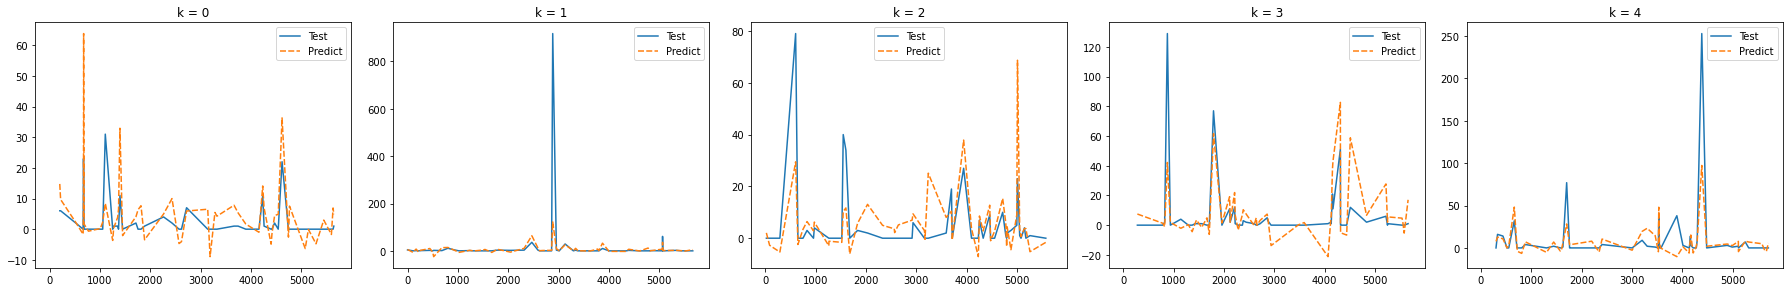

-----------------------------------------------------------------
alpha: 0.128
       Index         Mean
0    R2 Pred     0.214729
1         R2     0.214729
2         EV     0.215008
3         ME  1136.925186
4    MEAN_AE     8.779728
5        MSE  1073.056229
6  MEDIAN_AE     4.281360


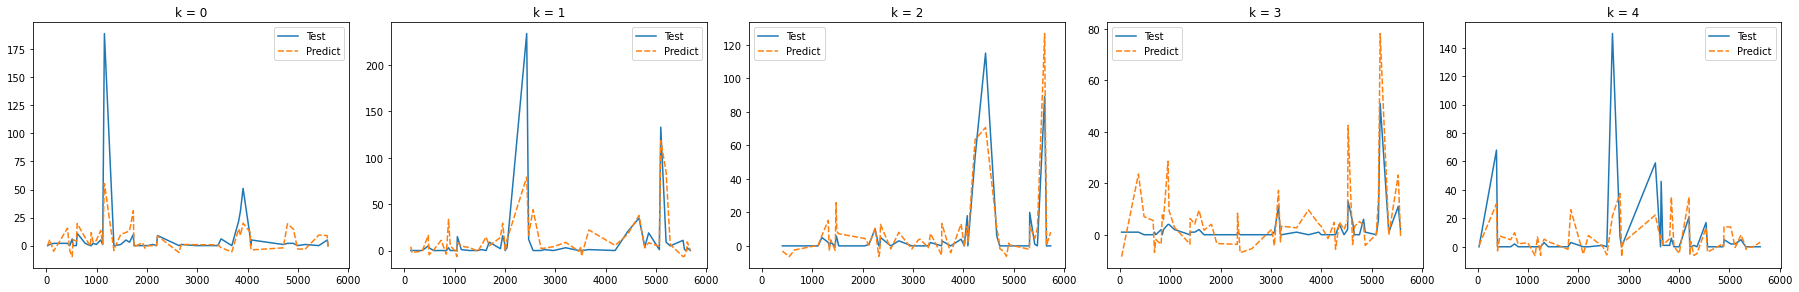

-----------------------------------------------------------------
alpha: 0.256
       Index         Mean
0    R2 Pred     0.214837
1         R2     0.214837
2         EV     0.215115
3         ME  1136.752248
4    MEAN_AE     8.778120
5        MSE  1072.862542
6  MEDIAN_AE     4.276495


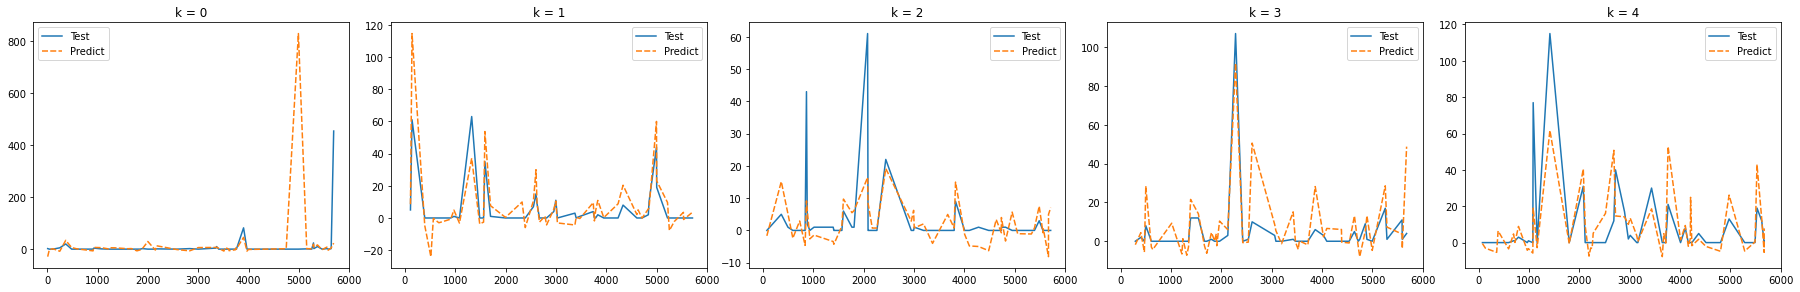

-----------------------------------------------------------------
alpha: 0.512
       Index         Mean
0    R2 Pred     0.215016
1         R2     0.215016
2         EV     0.215295
3         ME  1136.443698
4    MEAN_AE     8.775536
5        MSE  1072.544339
6  MEDIAN_AE     4.278666


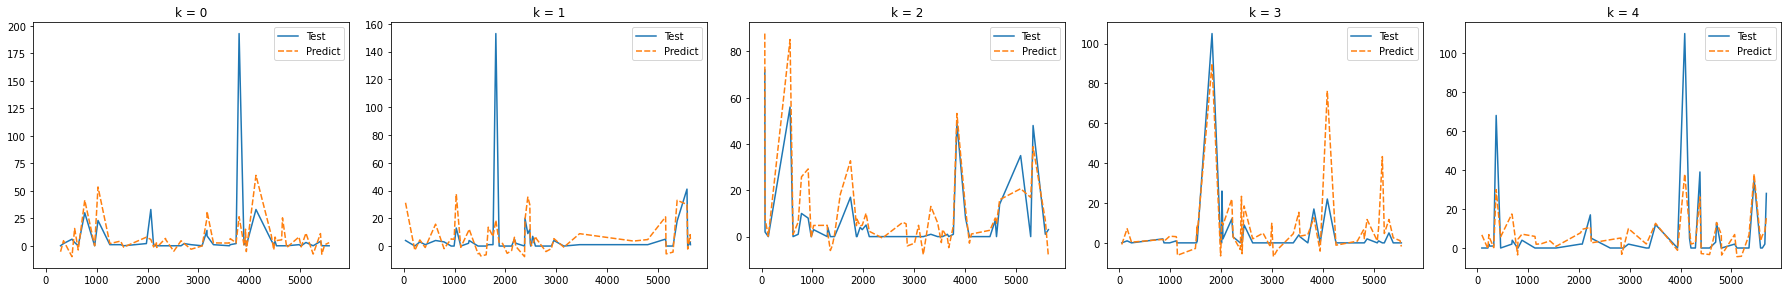

-----------------------------------------------------------------
alpha: 1.024
       Index         Mean
0    R2 Pred     0.215289
1         R2     0.215289
2         EV     0.215568
3         ME  1135.927011
4    MEAN_AE     8.771601
5        MSE  1072.074310
6  MEDIAN_AE     4.276184


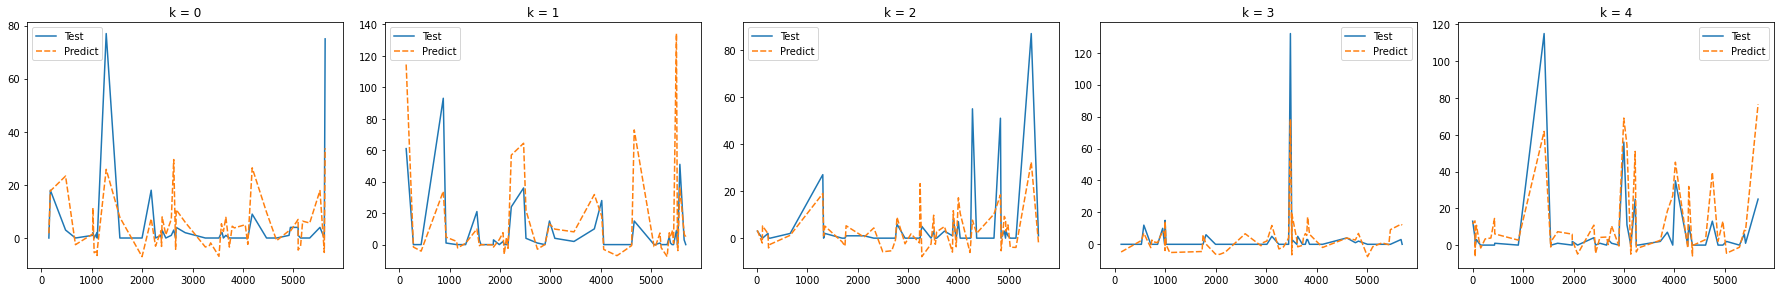

-----------------------------------------------------------------
alpha: 2.048
       Index         Mean
0    R2 Pred     0.215679
1         R2     0.215679
2         EV     0.215956
3         ME  1135.113244
4    MEAN_AE     8.765808
5        MSE  1071.440721
6  MEDIAN_AE     4.270843


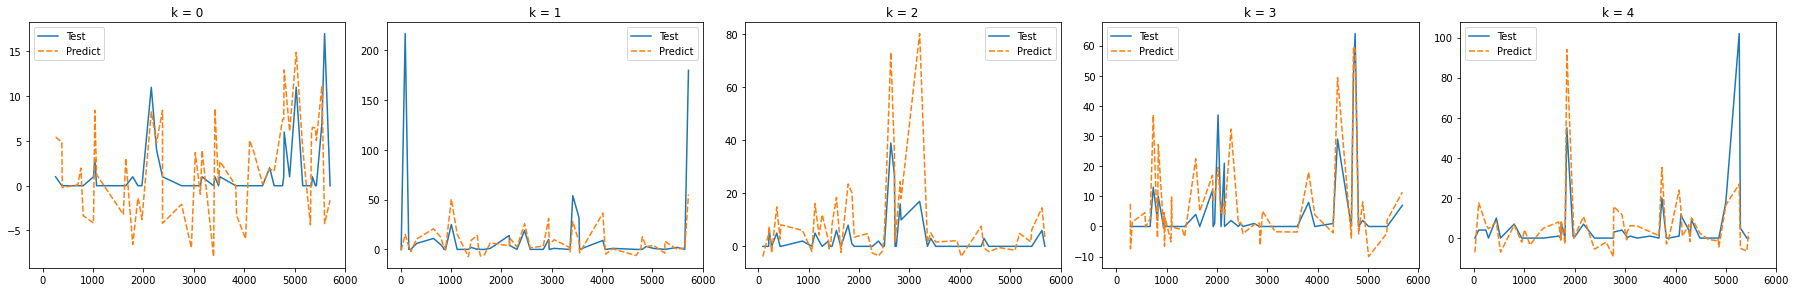

-----------------------------------------------------------------
alpha: 4.096
       Index         Mean
0    R2 Pred     0.216218
1         R2     0.216218
2         EV     0.216496
3         ME  1133.888032
4    MEAN_AE     8.757281
5        MSE  1070.621960
6  MEDIAN_AE     4.271306


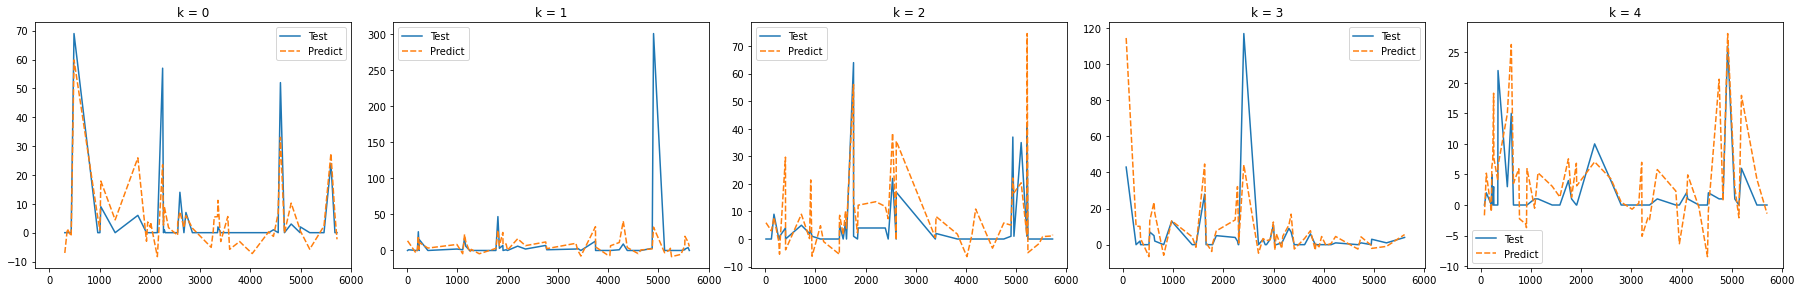

-----------------------------------------------------------------
alpha: 8.192
       Index         Mean
0    R2 Pred     0.216930
1         R2     0.216930
2         EV     0.217207
3         ME  1132.138375
4    MEAN_AE     8.745337
5        MSE  1069.601632
6  MEDIAN_AE     4.268389


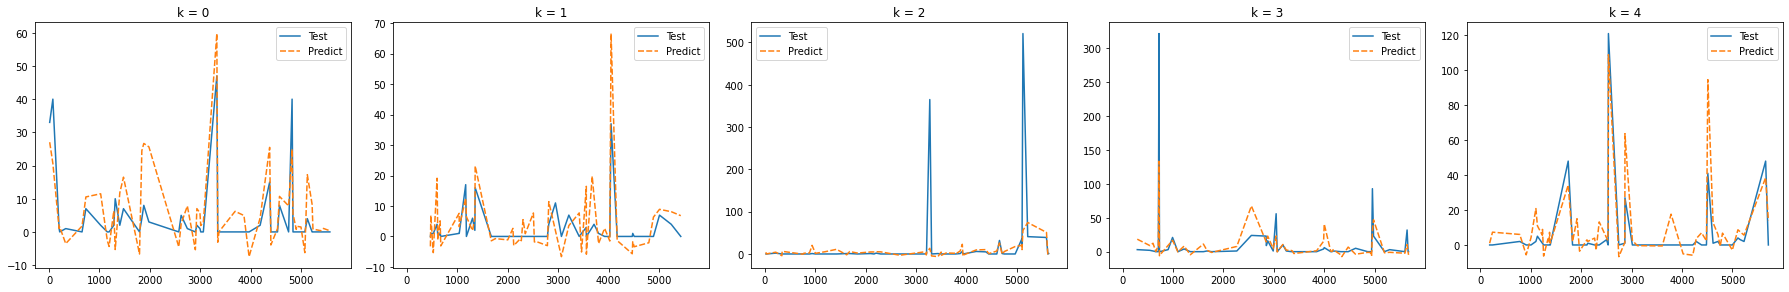

-----------------------------------------------------------------
alpha: 16.384
       Index         Mean
0    R2 Pred     0.217773
1         R2     0.217773
2         EV     0.218050
3         ME  1129.874212
4    MEAN_AE     8.730960
5        MSE  1068.431156
6  MEDIAN_AE     4.265435


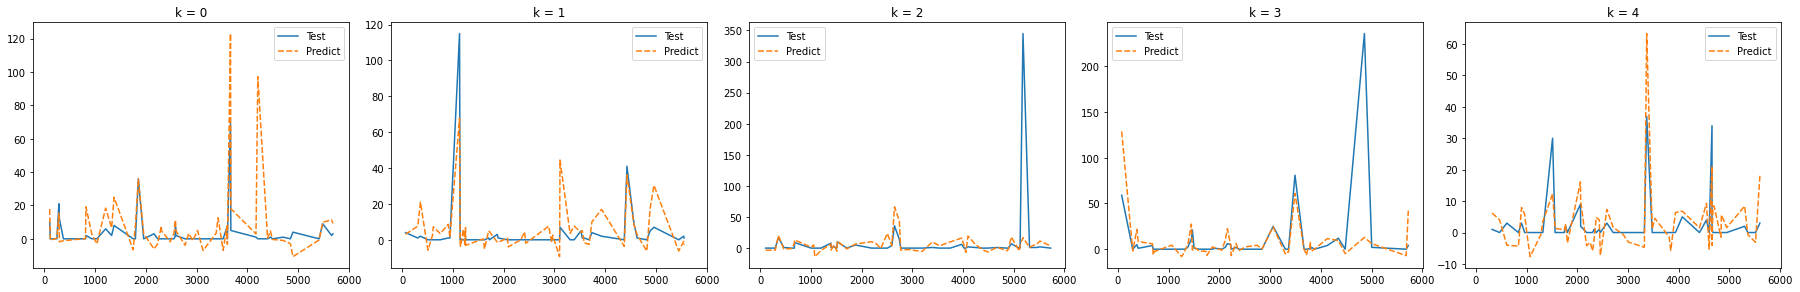

-----------------------------------------------------------------
alpha: 32.768
       Index         Mean
0    R2 Pred     0.218678
1         R2     0.218678
2         EV     0.218956
3         ME  1127.298292
4    MEAN_AE     8.714105
5        MSE  1067.193770
6  MEDIAN_AE     4.257499


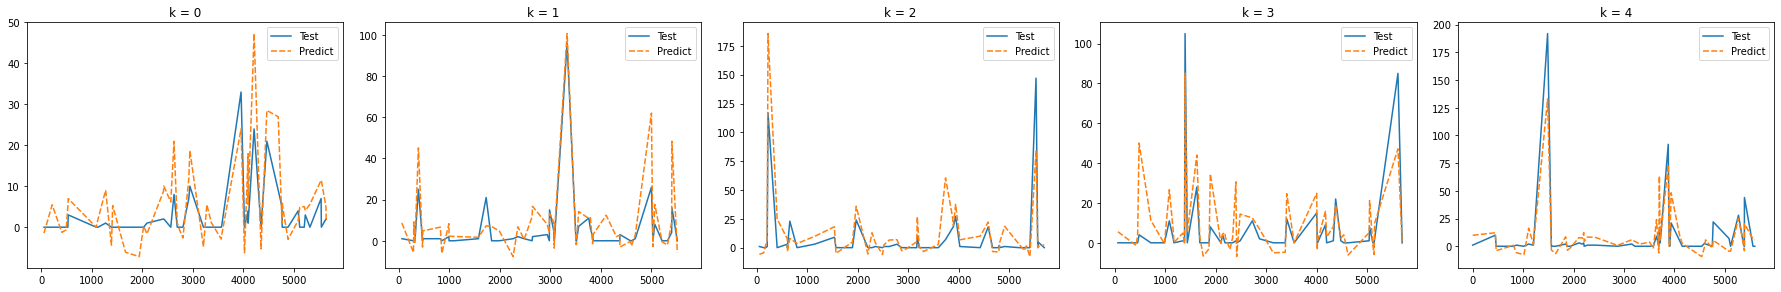

-----------------------------------------------------------------
alpha: 65.536
       Index         Mean
0    R2 Pred     0.219655
1         R2     0.219655
2         EV     0.219934
3         ME  1124.608968
4    MEAN_AE     8.693781
5        MSE  1065.877338
6  MEDIAN_AE     4.244139


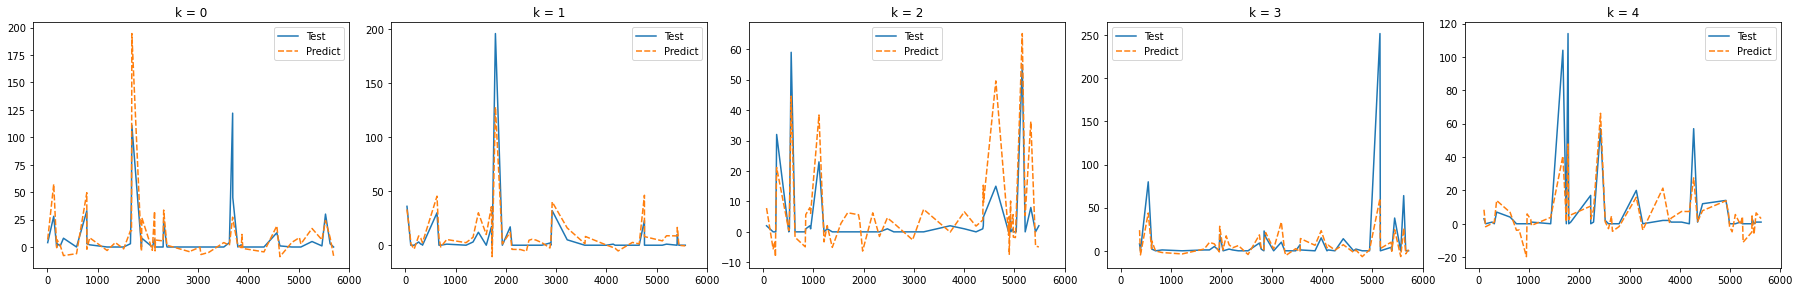

-----------------------------------------------------------------
alpha: 131.072
       Index         Mean
0    R2 Pred     0.220860
1         R2     0.220860
2         EV     0.221140
3         ME  1121.725852
4    MEAN_AE     8.671143
5        MSE  1064.285763
6  MEDIAN_AE     4.232861


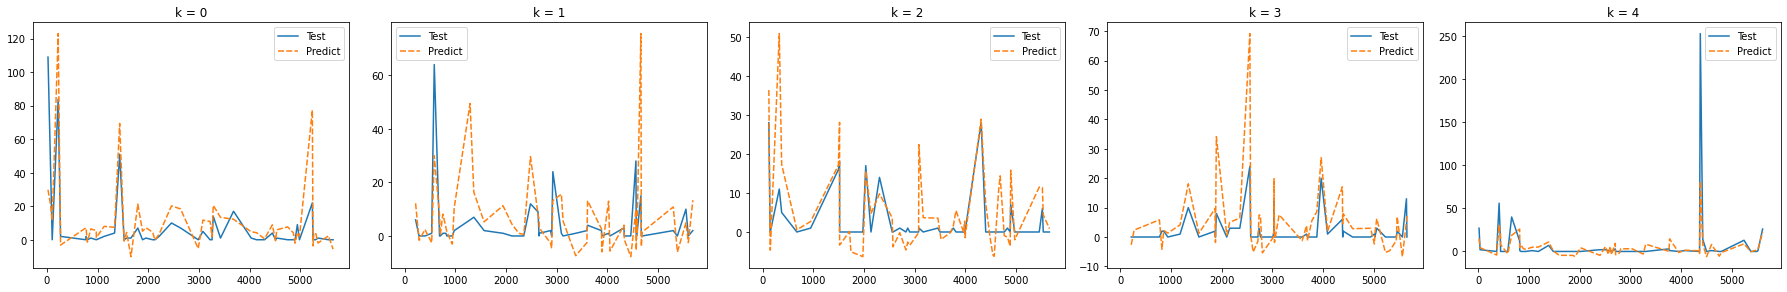

-----------------------------------------------------------------
alpha: 262.144
       Index         Mean
0    R2 Pred     0.222646
1         R2     0.222646
2         EV     0.222928
3         ME  1118.216261
4    MEAN_AE     8.645838
5        MSE  1061.976758
6  MEDIAN_AE     4.209780


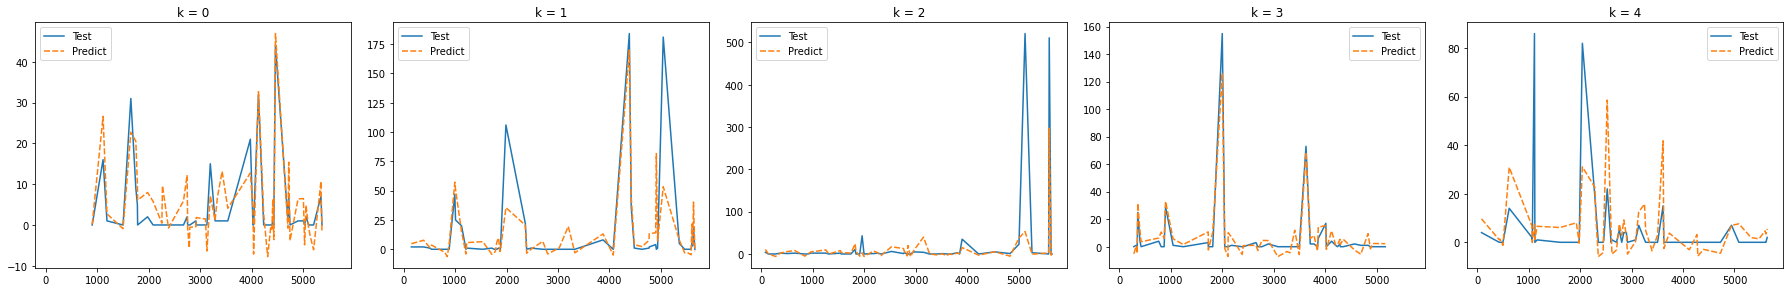

-----------------------------------------------------------------
alpha: 524.288
       Index         Mean
0    R2 Pred     0.225573
1         R2     0.225573
2         EV     0.225856
3         ME  1113.258118
4    MEAN_AE     8.617261
5        MSE  1058.242831
6  MEDIAN_AE     4.204231


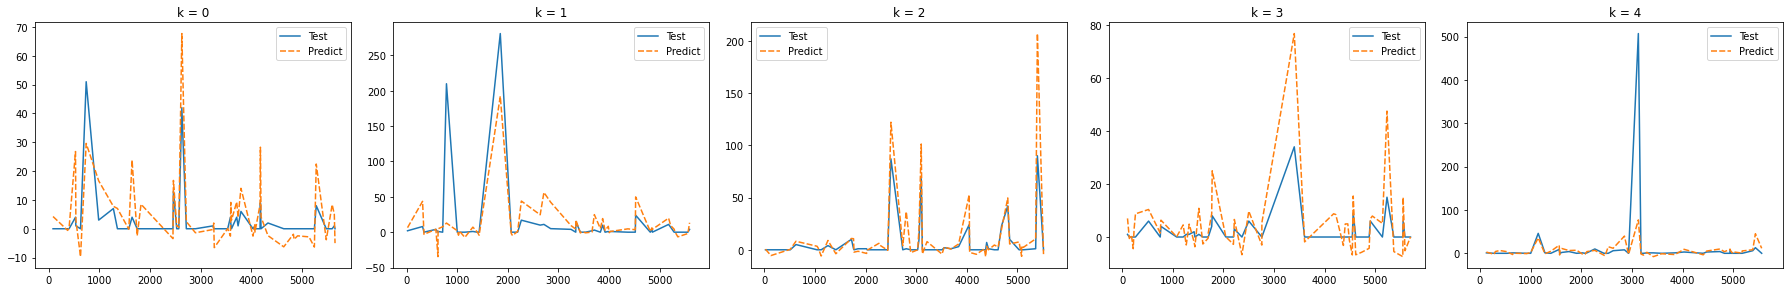

-----------------------------------------------------------------
alpha: 1048.576
       Index         Mean
0    R2 Pred     0.230311
1         R2     0.230311
2         EV     0.230596
3         ME  1105.433327
4    MEAN_AE     8.581531
5        MSE  1052.230917
6  MEDIAN_AE     4.191288


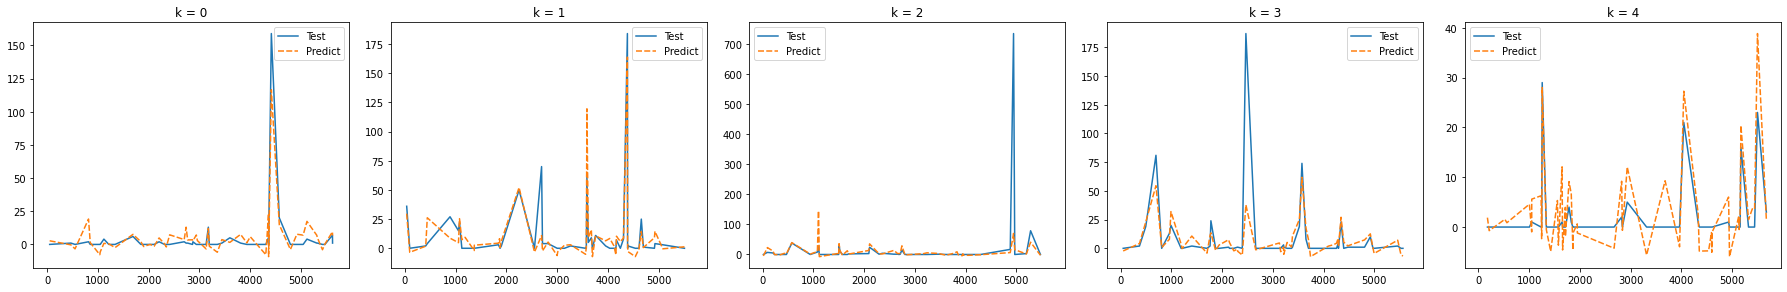

-----------------------------------------------------------------
alpha: 2097.152
       Index         Mean
0    R2 Pred     0.237368
1         R2     0.237368
2         EV     0.237655
3         ME  1092.559950
4    MEAN_AE     8.536817
5        MSE  1043.292372
6  MEDIAN_AE     4.161934


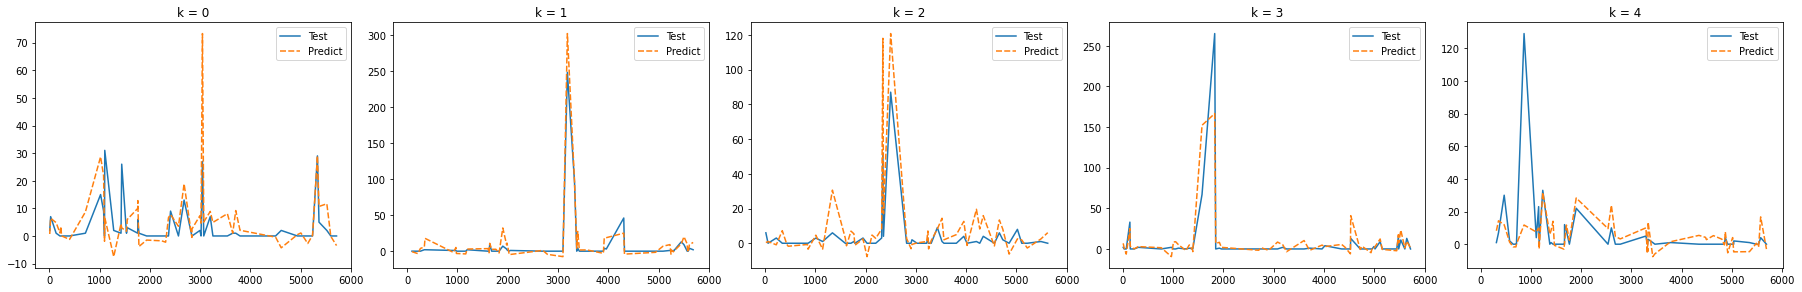

-----------------------------------------------------------------
alpha: 4194.304
       Index         Mean
0    R2 Pred     0.246563
1         R2     0.246563
2         EV     0.246850
3         ME  1072.174785
4    MEAN_AE     8.465625
5        MSE  1031.685682
6  MEDIAN_AE     4.093462


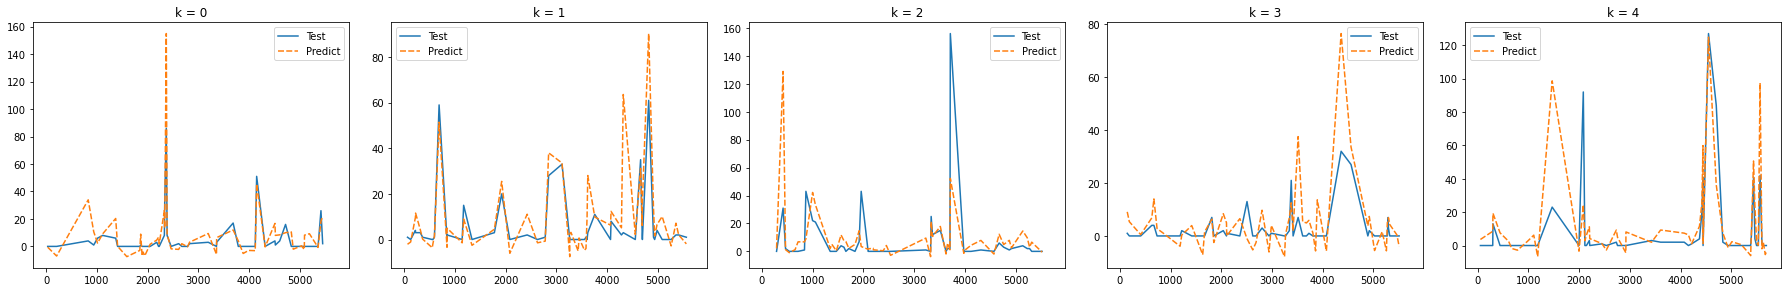

-----------------------------------------------------------------
alpha: 8388.608
       Index         Mean
0    R2 Pred     0.255865
1         R2     0.255865
2         EV     0.256151
3         ME  1043.142122
4    MEAN_AE     8.329352
5        MSE  1020.112826
6  MEDIAN_AE     3.898351


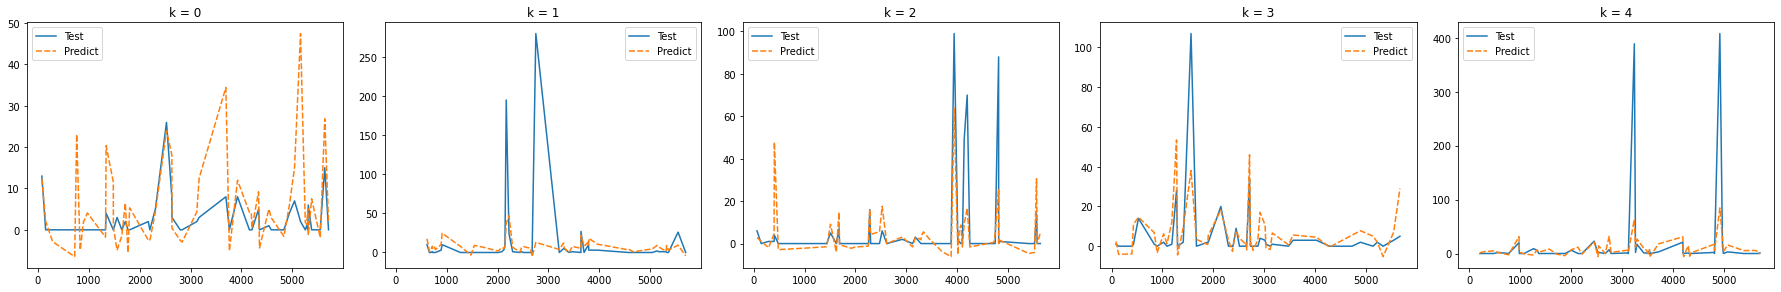

-----------------------------------------------------------------
alpha: 16777.216
       Index         Mean
0    R2 Pred     0.259730
1         R2     0.259730
2         EV     0.260012
3         ME  1007.634379
4    MEAN_AE     8.144745
5        MSE  1015.878496
6  MEDIAN_AE     3.563283


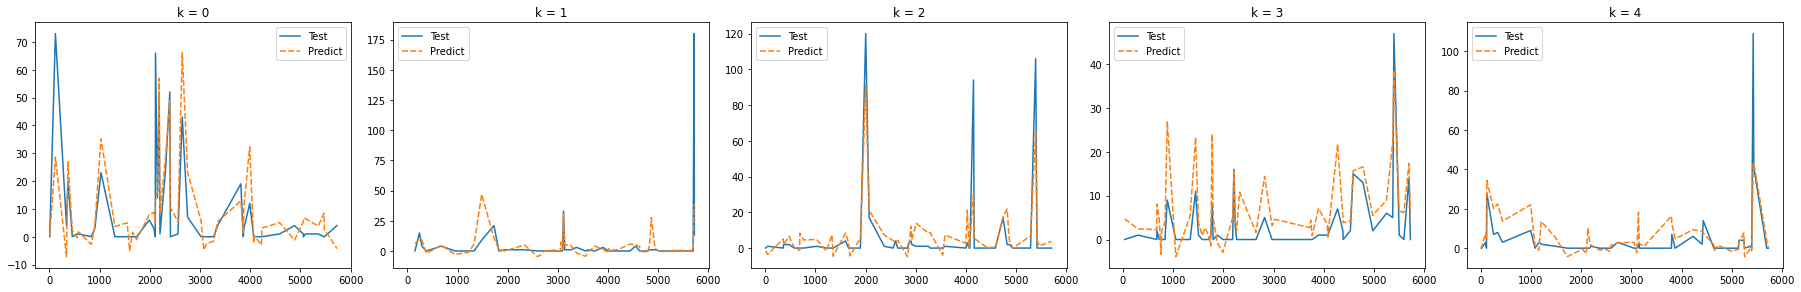

-----------------------------------------------------------------
alpha: 33554.432
       Index         Mean
0    R2 Pred     0.250349
1         R2     0.250349
2         EV     0.250626
3         ME  1001.927548
4    MEAN_AE     8.037384
5        MSE  1029.166806
6  MEDIAN_AE     3.079596


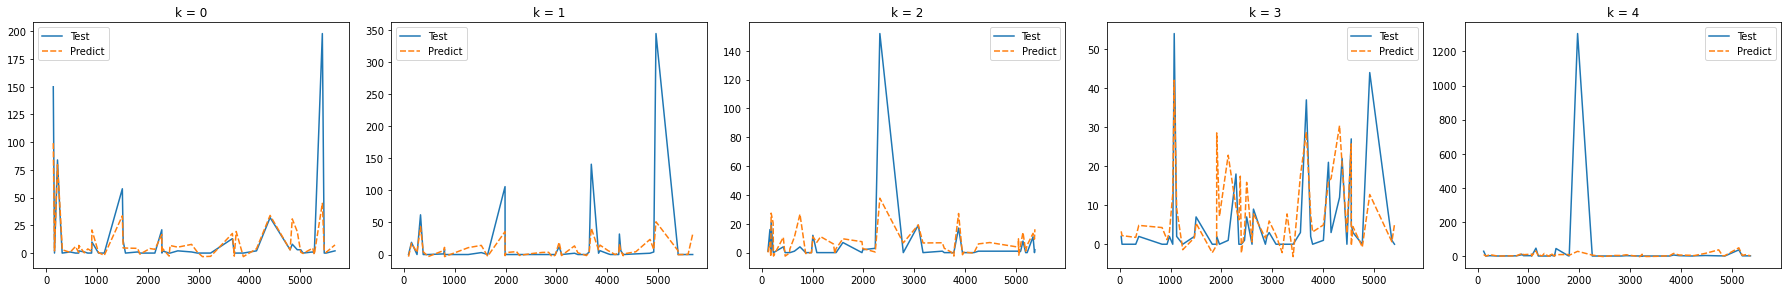

-----------------------------------------------------------------
alpha: 67108.864
       Index         Mean
0    R2 Pred     0.224519
1         R2     0.224519
2         EV     0.224791
3         ME  1015.005715
4    MEAN_AE     8.143878
5        MSE  1064.095369
6  MEDIAN_AE     2.765374


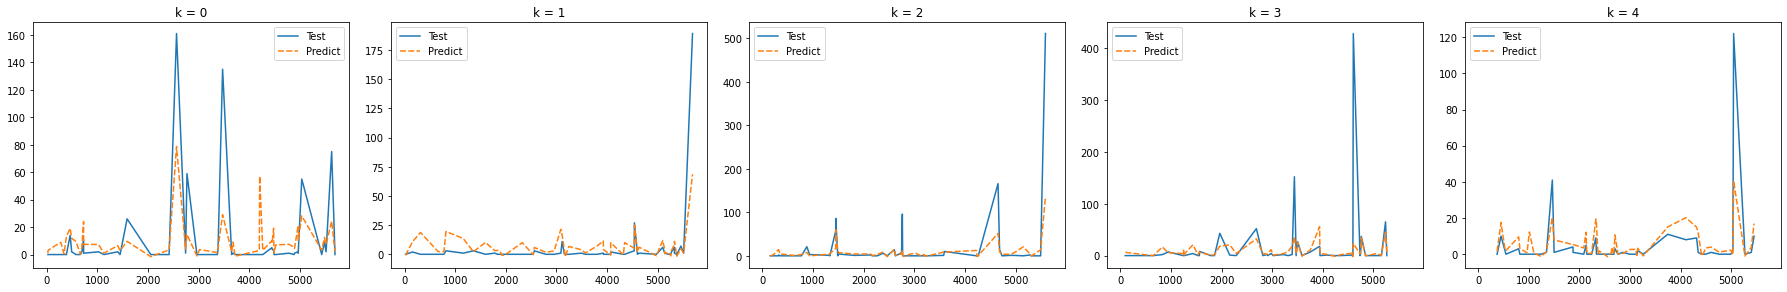

-----------------------------------------------------------------
alpha: 134217.728
       Index         Mean
0    R2 Pred     0.187741
1         R2     0.187741
2         EV     0.188011
3         ME  1028.278785
4    MEAN_AE     8.535888
5        MSE  1113.480355
6  MEDIAN_AE     3.034568


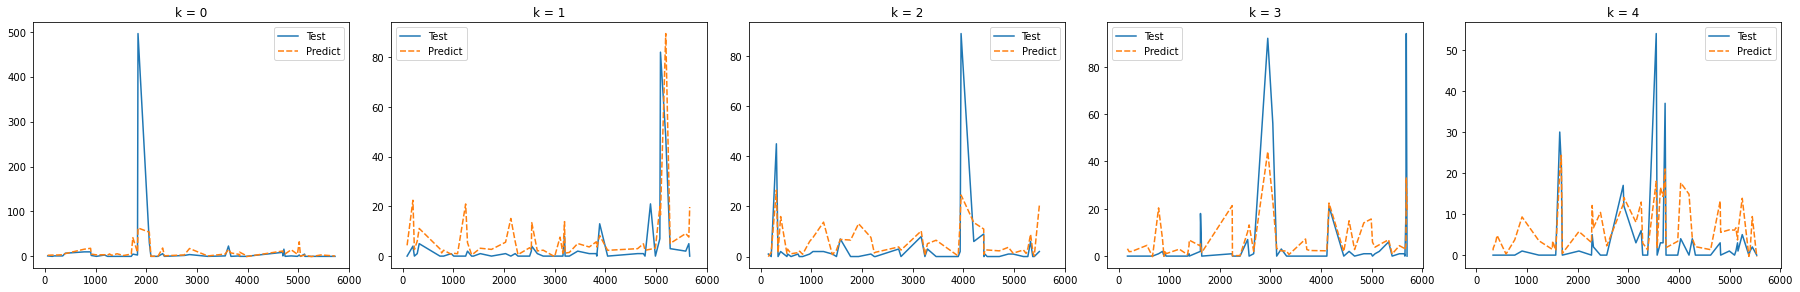

-----------------------------------------------------------------
alpha: 268435.456
       Index         Mean
0    R2 Pred     0.147368
1         R2     0.147368
2         EV     0.147638
3         ME  1040.747098
4    MEAN_AE     9.171837
5        MSE  1167.699450
6  MEDIAN_AE     3.657256


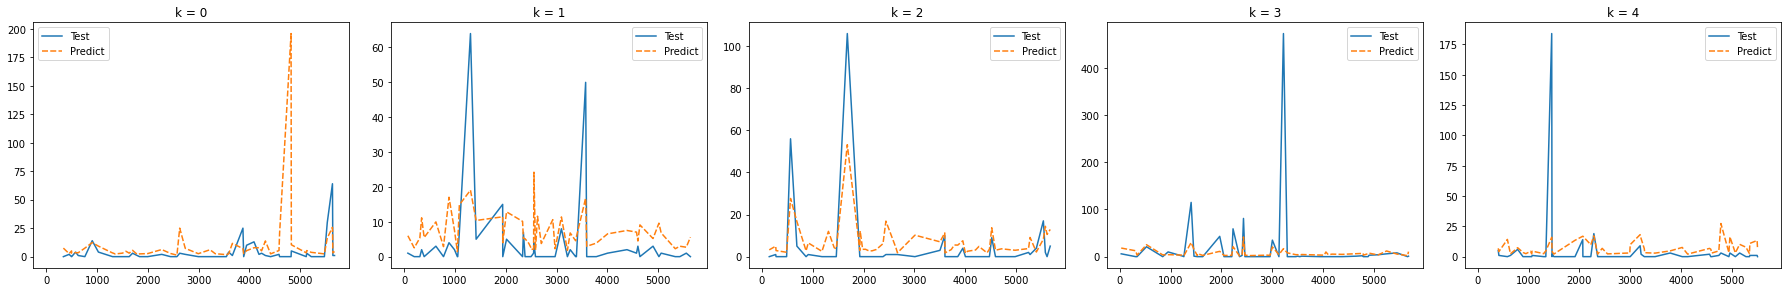

-----------------------------------------------------------------
            0.001        0.002        0.004        0.008        0.016       \
R2 Pred       0.214605     0.214606     0.214608     0.214612     0.214621   
R2            0.214605     0.214606     0.214608     0.214612     0.214621   
EV            0.214884     0.214885     0.214887     0.214891     0.214900   
ME         1137.112907  1137.111356  1137.108259  1137.102078  1137.089775   
MEAN_AE       8.781676     8.781659     8.781626     8.781559     8.781425   
MSE        1073.280710  1073.278791  1073.274960  1073.267331  1073.252197   
MEDIAN_AE     4.281783     4.281799     4.281831     4.282063     4.282239   

            0.032        0.064        0.128        0.256        0.512       \
R2 Pred       0.214637     0.214669     0.214729     0.214837     0.215016   
R2            0.214637     0.214669     0.214729     0.214837     0.215016   
EV            0.214916     0.214948     0.215008     0.215115     0.215295 

In [14]:
select_hyperparam()

## Learning Curve

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [15]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    plt.show()

## Todo: Validation Curve

https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

## Final Model

In [16]:
def train_final_model():
    # Normalization
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize(X_train, X_test, y_train, y_test)

    # Ridge
    model = Ridge(alpha=16777.216)

    # Model Training
    predict = train_model(model, X_train_norm, y_train_norm, X_test_norm)
    plot_learning_curve(model, "Learning Curve", X_train_norm, y_train_norm)
    plot_test_predict(y_train, y_test_norm, predict)

    # Model Evaluation
    r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, y_train, X_test_norm, y_test_norm, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2_pred, r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)

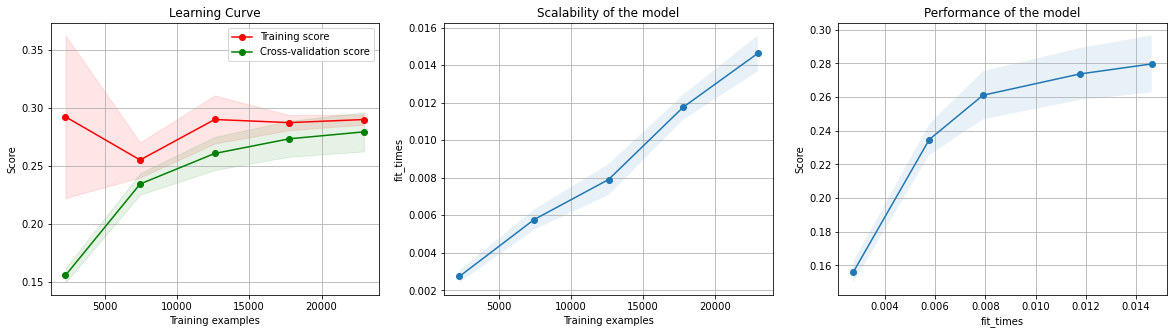

       Index        Mean
0    R2 Pred    0.335138
1         R2    0.335138
2         EV    0.335349
3         ME  947.941157
4    MEAN_AE    7.672767
5        MSE  675.158477
6  MEDIAN_AE    3.716687


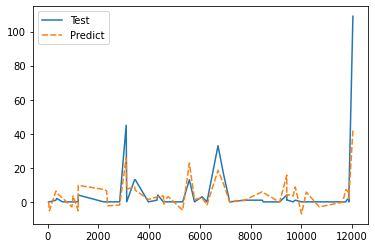

In [17]:
train_final_model()